In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

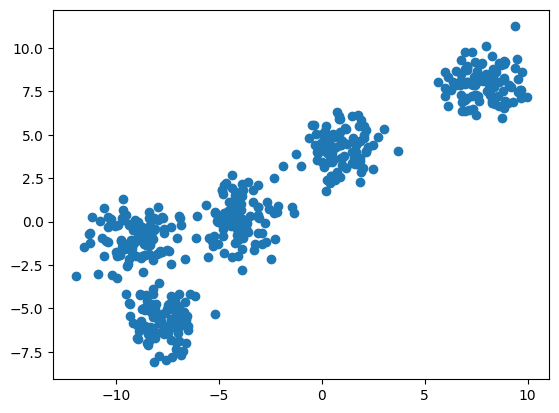

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

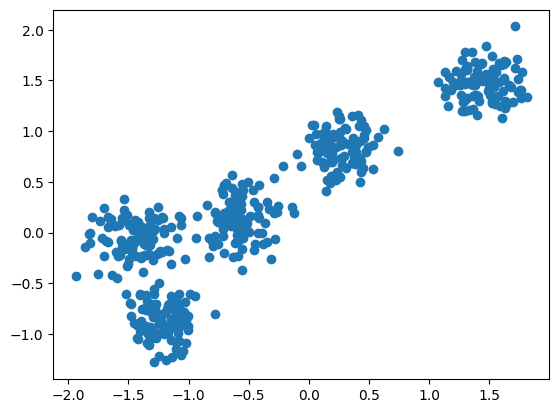

In [4]:
def normalise(X):
    u = X.mean()
    std = X.std()
    return (X-u)/std

X = normalise(X)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
#Initialize k centers
n_features = 2
k = 5
colors = ['green', 'red','blue','yellow', 'orange']
def init(k):
    centroids = {}
    for i in range(k):
        center = 2*(2*np.random.random((n_features,)) - 1)
        
        centroids[i] = {
            'center' : center,
            'color' : colors[i],
            'points' : []
        }
    return centroids

centroids = init(k)

In [6]:
def distance(p,q):
    return np.sqrt(np.sum((p-q)**2))

def assignPtsToCluster(X,centroids):
    m = X.shape[0]
    for i in range(m):
        cdist = []
        cx = X[i]
        
        for j in range(k):
            dist = distance(centroids[j]['center'],cx)
            cdist.append(dist)
            
        clusterId = np.argmin(cdist)
        centroids[clusterId]['points'].append(cx) 

In [7]:
def updateClusters(centroids):
    for kx in range(k):
        pts = np.array(centroids[kx]['points'])
        
        if pts.shape[0]>0:
            new_center = pts.mean(axis=0)
            centroids[kx]['center'] = new_center
            centroids[kx]['points'] = []

In [8]:
def plotClusters(centroids):

    for kx in range(k):
        pts = np.array(centroids[kx]['points'])

        if(pts.shape[0]>0):
            plt.scatter(pts[:,0],pts[:,1],color=centroids[kx]['color'])
        uk = centroids[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')
     

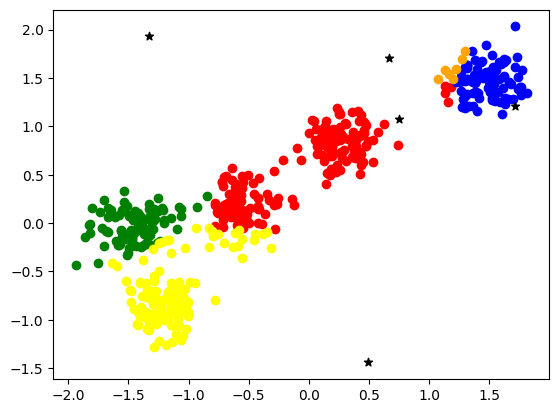

In [9]:
centroids = init(k)
assignPtsToCluster(X,centroids)
plotClusters(centroids)

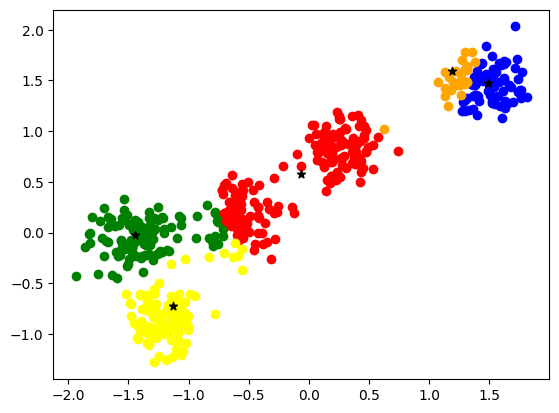

In [10]:
updateClusters(centroids)
assignPtsToCluster(X,centroids)
plotClusters(centroids)